In [3]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

In [4]:
class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=100):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w/2, w/2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._compute_coordinates()

    def _compute_coordinates(self):
        U, V = self.U, self.V
        X = (self.R + V * np.cos(U / 2)) * np.cos(U)
        Y = (self.R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def surface_area(self):
        def integrand(v, u):
            dx_du = -np.sin(u)*(self.R + v*np.cos(u/2)) - 0.5*v*np.sin(u/2)*np.cos(u)
            dy_du = np.cos(u)*(self.R + v*np.cos(u/2)) - 0.5*v*np.sin(u/2)*np.sin(u)
            dz_du = 0.5*v*np.cos(u/2)

            dx_dv = np.cos(u)*np.cos(u/2)
            dy_dv = np.sin(u)*np.cos(u/2)
            dz_dv = np.sin(u/2)

            cross_prod = np.array([
                dy_du * dz_dv - dz_du * dy_dv,
                dz_du * dx_dv - dx_du * dz_dv,
                dx_du * dy_dv - dy_du * dx_dv
            ])
            return np.linalg.norm(cross_prod)

        area, _ = dblquad(integrand, 0, 2*np.pi, lambda u: -self.w/2, lambda u: self.w/2)
        return area

    def edge_length(self):
        u_vals = np.linspace(0, 2*np.pi, self.n)
        v_const = self.w / 2
        x = (self.R + v_const * np.cos(u_vals / 2)) * np.cos(u_vals)
        y = (self.R + v_const * np.cos(u_vals / 2)) * np.sin(u_vals)
        z = v_const * np.sin(u_vals / 2)
        points = np.vstack((x, y, z)).T
        diffs = np.diff(points, axis=0)
        dists = np.linalg.norm(diffs, axis=1)
        return np.sum(dists)

    def plot(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=1, cstride=1, color='skyblue', edgecolor='k', alpha=0.8)
        ax.set_title("Mobius Strip")
        plt.tight_layout()
        plt.savefig("mobius_plot.png")
        plt.show(color='red')



1.0
0.2
200
Surface Area: 1.2572
Edge Length: 6.2908


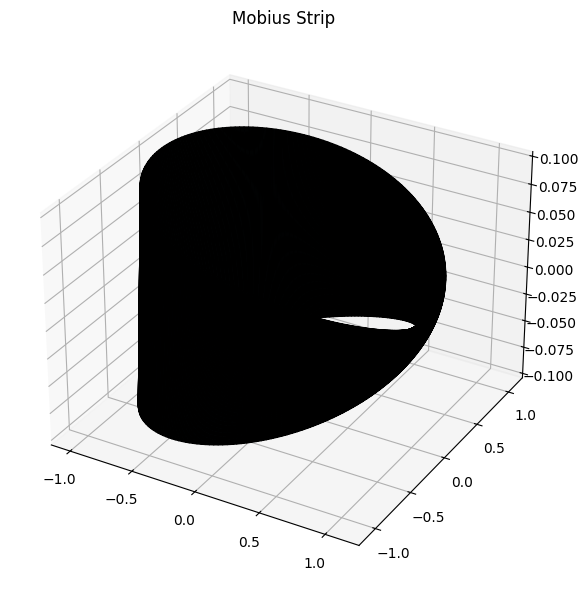

In [6]:
if __name__ == "__main__":
    R=float(input())
    w=float(input())
    n=int(input())
    mobius = MobiusStrip(R=1.0, w=0.2, n=200)
    area = mobius.surface_area()
    length = mobius.edge_length()
    print(f"Surface Area: {area:.4f}")
    print(f"Edge Length: {length:.4f}")
    mobius.plot()
